In [397]:
import os
os.getcwd()

'/Users/ashutoshsaini/eniac-discount-analysis/notebooks'

In [398]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

orders_df = pd.read_csv('../data/raw/orders.csv')

In [399]:
orders_orig = orders_df.copy()

In [400]:
orderlines_df = pd.read_csv('../data/raw/orderlines.csv')

In [401]:
products_df = pd.read_csv('../data/raw/products.csv')

In [402]:
brands_df = pd.read_csv('../data/raw/brands.csv')

In [403]:

orders_df.head(10)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
7,245851,2017-04-04 20:58:21,79.99,Pending
8,245941,2017-01-01 10:32:23,183.52,Completed
9,246018,2017-02-13 23:02:57,211.95,Completed


In [404]:
orders_df.nunique()

order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

In [405]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [406]:
orders_df.isnull().any()

order_id        False
created_date    False
total_paid       True
state           False
dtype: bool

In [407]:
orders_df.isnull().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [408]:
orders_df['order_id'].unique()

array([241319, 241423, 242832, ..., 527399, 527400, 527401])

In [409]:
state_mask = orders_df['state'] == 'Completed'
#state_mask
orders_df.loc[state_mask].nunique()

order_id        46605
created_date    46506
total_paid      12834
state               1
dtype: int64

In [410]:
#state_mask.isnull().sum 

#this is not helping me, my fault here was that I was using boolean on a Series and not a df.

In [411]:
completed_orders = orders_df.loc[state_mask]

completed_orders['total_paid'].isnull().sum()


np.int64(0)

In [412]:
#I would like to know the number of completed orders

state_mask.value_counts()

state
False    180304
True      46605
Name: count, dtype: int64

In [413]:
# I would now like to know the percentage of completed orders, just to make proportion of completed orders more visible

completed_orders_percentage = (state_mask.sum()/len(state_mask))*100

completed_orders_percentage

np.float64(20.53907072879436)

Only 20.54% of orders(completed orders) contribute to the total revenue of Eniac 

In [414]:
#I will now calculate the percenatge of pending and cancelled orders

pending_order_mask = orders_df['state'] == 'Pending'

pending_orders_count = (orders_df['state'] == 'Pending').sum()
percentage_of_pending_orders = (pending_orders_count/len(pending_order_mask))*100

percentage_of_pending_orders

np.float64(6.336901577284286)

In [415]:
cancelled_order_mask = orders_df['state'] == 'Cancelled'

cancelled_orders_count = (orders_df['state'] == 'Cancelled').sum()
percentage_of_cancelled_orders = (cancelled_orders_count/len(cancelled_order_mask))*100

percentage_of_cancelled_orders

np.float64(3.187621469399627)

# Now I will calculate the percentage share of Shopping Basket orders and Place Order state.

In [416]:
shopping_basket_order_mask = orders_df['state'] == 'Shopping Basket'

shopping_basket_order_mask_count = (orders_df['state'] == 'Shopping Basket').sum()
percentage_of_shopping_basket_order_mask = (shopping_basket_order_mask_count/len(shopping_basket_order_mask))*100

percentage_of_shopping_basket_order_mask

np.float64(51.9190512496199)

In [417]:
place_order_mask = orders_df['state'] == 'Place Order'

place_order_mask_count = (orders_df['state'] == 'Place Order').sum()
percentage_of_place_order_mask = (place_order_mask_count/len(place_order_mask))*100

percentage_of_place_order_mask

np.float64(18.017354974901835)

In [418]:
(orders_df['state'].value_counts(normalize=True) * 100)#.sum()

state
Shopping Basket    51.919051
Completed          20.539071
Place Order        18.017355
Pending             6.336902
Cancelled           3.187621
Name: proportion, dtype: float64

In [419]:
# sanity Check

total_state_masks_count = percentage_of_pending_orders + percentage_of_shopping_basket_order_mask + percentage_of_cancelled_orders + completed_orders_percentage + percentage_of_place_order_mask


total_state_masks_count

np.float64(100.00000000000001)

The Shopping Basket orders account for ~51.92% and Completed orders account for ~20.54%.

In [420]:
completed_orders = orders_df.loc[state_mask]

completed_orders_df = completed_orders.copy()

In [421]:
orderlines_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [422]:
products_df.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


My next dataframe to explore is orderlines_df

In [423]:
orderlines_df_original = orderlines_df.copy()


In [424]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [425]:
orderlines_df.head(15)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11


In [426]:
orderlines_df.isnull().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [427]:
orderlines_df.nunique()

id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

In [428]:
orderlines_df.duplicated().sum()

np.int64(0)

I will now change the Datatypes for date column to Datetime and unit_price to int

In [429]:
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'], errors = 'coerce')

In [430]:
orderlines_df['unit_price'] = pd.to_numeric(orderlines_df['unit_price'], errors = 'coerce')



In [431]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        257814 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 15.7+ MB


In [432]:
orderlines_df.isnull().sum()



id                      0
id_order                0
product_id              0
product_quantity        0
sku                     0
unit_price          36169
date                    0
dtype: int64

In [433]:
orderlines_df.loc[:,['unit_price','sku']].isnull().value_counts()

unit_price  sku  
False       False    257814
True        False     36169
Name: count, dtype: int64

Finally after exploring the orderlines_df I will move to products_df

In [434]:
products_df_orig = products_df.copy() 

In [435]:
products_df.head(20)

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45,420.003,0,1230
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,146.471,0,1364
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,274.694,0,1364
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74,669.904,0,1364
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35,330.003,0,1325


In [436]:
products_df.isnull().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [437]:
products_df.duplicated().value_counts()

False    10580
True      8746
Name: count, dtype: int64

In [438]:
duplicated_rows_mask = products_df['sku'].duplicated()

products_df.loc[duplicated_rows_mask]

,sku,name,desc,price,promo_price,in_stock,type
101,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
102,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
103,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
104,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
105,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
...,...,...,...,...,...,...,...
16831,APP2302,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,26.155.941,26.155.941,0,"1,02E+12"
16833,APP2303,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,237.559.421,23.755.942,0,"1,02E+12"
18190,PAR0077,Parrot Bebop Drone 2 Power,Drone cuadricóptero quality camera integrated ...,699.9,6.733.892,0,11905404
18308,NKI0010,Nokia Wireless sphygmomanometer Plata,Sphygmomanometer for iPhone iPad and iPod App.,129.99,1.149.899,1,11905404


In [439]:
duplicated_sku_mask = products_df['sku'] == 'APP0390'

In [440]:
duplicate_sku = products_df.loc[duplicated_sku_mask]

duplicate_sku.duplicated().sum()


np.int64(8)

In [441]:
duplicate_sku.nunique()

sku            1
name           1
desc           1
price          1
promo_price    1
in_stock       1
type           1
dtype: int64

In [442]:
duplicated_skus = products_df[products_df['sku'].duplicated(keep=False)]
duplicated_skus

,sku,name,desc,price,promo_price,in_stock,type
100,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
101,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
102,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
103,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
104,APP0390,"Apple MacBook Pro 133 ""Core i5 25GHz | 4GB RAM...",MacBook Pro laptop 133 inches (MD101Y / A).,1199,11.455.917,0,1282
...,...,...,...,...,...,...,...
18190,PAR0077,Parrot Bebop Drone 2 Power,Drone cuadricóptero quality camera integrated ...,699.9,6.733.892,0,11905404
18307,NKI0010,Nokia Wireless sphygmomanometer Plata,Sphygmomanometer for iPhone iPad and iPod App.,129.99,1.149.899,1,11905404
18308,NKI0010,Nokia Wireless sphygmomanometer Plata,Sphygmomanometer for iPhone iPad and iPod App.,129.99,1.149.899,1,11905404
18513,PLA0035,Bluetooth Headset Plantronics Explorer 80,egonómico wireless headset design for iPhone i...,39.99,349.896,1,5384


Important part starts now, this includes the removal of the hazardous skus from the dataframe

In [443]:
duplicated_skus.groupby('sku').nunique()

,name,desc,price,promo_price,in_stock,type
sku,,,,,,
AII0013,1,1,1,1,1,1
APP0390,1,1,1,1,1,1
APP0574,1,1,1,1,1,1
APP0624,1,1,1,1,1,1
APP0733,1,1,1,1,1,1
...,...,...,...,...,...,...
SYN0140,1,1,1,1,1,1
SYN0141,1,1,1,1,1,1
SYN0142,1,1,1,1,1,1


In [444]:
'''PLEASE DISCARD THIS CODE SNIPPET, 

WHY: BECAUSE IT DROPPED A LOT OF ROWS AND EVEN WITH ONE SKU CONSIDERING IT AS A DUPLICATE, WHIHC IS NOT THE RIGHT APPROACH. 

THEREFORE I DECIDED TO HAVE ONE ROW PER SKU AND NOT 0 ROWS PER DUPLICATED SKUs

FOR EX, IT DELETED ENTIRELY THAT SKU FROM THE DATAFRAME WHIHC WAS A DUPLICATE, MEANING IF THERE IS AN SKU AP033090 IT DELETED THAT COMPLETELY AND WE DONT WANT THAT

WE WANT THAT SKU BUT ONLY ONES PER ROW'''

#products_df_1 = products_df.drop_duplicates(subset='sku', keep = False)

#products_df_1


'PLEASE DISCARD THIS CODE SNIPPET, \n\nWHY: BECAUSE IT DROPPED A LOT OF ROWS AND EVEN WITH ONE SKU CONSIDERING IT AS A DUPLICATE, WHIHC IS NOT THE RIGHT APPROACH. \n\nTHEREFORE I DECIDED TO HAVE ONE ROW PER SKU AND NOT 0 ROWS PER DUPLICATED SKUs\n\nFOR EX, IT DELETED ENTIRELY THAT SKU FROM THE DATAFRAME WHIHC WAS A DUPLICATE, MEANING IF THERE IS AN SKU AP033090 IT DELETED THAT COMPLETELY AND WE DONT WANT THAT\n\nWE WANT THAT SKU BUT ONLY ONES PER ROW'

The code snippet which you see right below, ... this cell has one trick, guess what, i used a parameter keep= 'first' this allows us to safeguard each row per unique skus which is much needed rather than just deleting all skus which are duplicated. So we have now no duplicate skus from the cell below.

In [445]:
products_df = products_df.drop_duplicates(subset = 'sku', keep = 'first')

products_df

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


another step is to remove promo_price column. Why I want to remove promo_price, because it is not adding any useful value, instead creating noise in the dataframe, my golden source of truth to look for discounting strategy lies in the columns price in products_df adn unit_price in orderlines_df 

In [446]:
products_df.isnull().sum()

sku             0
name            0
desc            7
price          45
promo_price     0
in_stock        0
type           50
dtype: int64

In [447]:
products_df

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [448]:
orderlines_df.isnull().sum()

id                      0
id_order                0
product_id              0
product_quantity        0
sku                     0
unit_price          36169
date                    0
dtype: int64

In [449]:
type(completed_orders)

pandas.core.frame.DataFrame

In [496]:
completed_orders.nunique(), len(completed_orders)

(46605, 46605)

In [503]:
orderlines_df_completed = orderlines_df.loc[orderlines_df['id_order'].isin(completed_orders)]

In [504]:
merged_product_orderline_df = orderlines_df_completed.merge(products_df, left_on='sku',right_on='sku',how='left')

merged_product_orderline_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89,649.903,1.0,13005399
3,1119126,299549,0,1,PAC0929,NaN,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209,26.679.895,0.0,1282
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,199.904,0.0,13835403
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25,99.898,1.0,1230
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25,99.898,1.0,1230
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25,99.898,1.0,1230


In [453]:
#merged_product_orderline_df.drop(['promo_price', 'type'], axis=1, inplace=True)

#merged_product_orderline_df

In [543]:
merged_product_orderline_df


,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,revenue,product_category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395,47.49,desktop
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720,18.99,other
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,649.903,1.0,13005399,72.19,"laptop, charger"
3,1119126,299549,0,1,PAC0929,NaN,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,26.679.895,0.0,1282,NaN,desktop
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298,60.90,storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,199.904,0.0,13835403,16.52,"laptop, case, protection"
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,cable
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,cable
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,29.97,cable


In [506]:
merged_product_orderline_df['price'] = pd.to_numeric(merged_product_orderline_df['price'], errors= 'coerce')

In [507]:
merged_product_orderline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62103 entries, 0 to 62102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62103 non-null  int64         
 1   id_order          62103 non-null  int64         
 2   product_id        62103 non-null  int64         
 3   product_quantity  62103 non-null  int64         
 4   sku               62103 non-null  object        
 5   unit_price        58542 non-null  float64       
 6   date              62103 non-null  datetime64[ns]
 7   name              61742 non-null  object        
 8   desc              61738 non-null  object        
 9   price             60911 non-null  float64       
 10  promo_price       61742 non-null  object        
 11  in_stock          61742 non-null  float64       
 12  type              61729 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 6.2+ MB


In [508]:
merged_product_orderline_df['revenue'] = merged_product_orderline_df['unit_price']* merged_product_orderline_df['product_quantity']

In [509]:
merged_product_orderline_df['revenue'].isnull().sum()

np.int64(3561)

In [510]:
merged_product_orderline_df['unit_price'].isnull().sum()

np.int64(3561)

In [511]:
(merged_product_orderline_df['revenue'] < 0).sum()

np.int64(0)

In [512]:
mask = (merged_product_orderline_df['revenue'] == 0) & (merged_product_orderline_df['product_quantity'] > 0)
mask.sum() 

np.int64(49)

In [513]:
merged_product_orderline_df['revenue'].min()

np.float64(0.0)

In [514]:
merged_product_orderline_df['revenue'].median()

np.float64(69.29)

In [515]:
merged_product_orderline_df['revenue'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.25     29.28
0.50     69.29
0.75    164.99
0.95    578.99
0.99    899.00
Name: revenue, dtype: float64

In [516]:
merged_product_orderline_df['name'].head()

0    OWC In-line Digital Temperature Sensor Kit HDD...
1                 iOttie Easy View 2 Car Black Support
2    Apple 85W MagSafe 2 charger MacBook Pro screen...
3    Apple iMac 27 "Core i5 3.2GHz Retina 5K | 32GB...
4                   (Open) Crucial 240GB SSD 7mm BX200
Name: name, dtype: object

In [517]:
merged_product_orderline_df['product_category'] = pd.NA

In [518]:
merged_product_orderline_df['product_category'].isna().sum()

np.int64(62103)

I will now check to have nay mac_mask items i have and rest sould be NA.

In [519]:
merged_product_orderline_df['product_category'].value_counts(dropna=False)

product_category
<NA>    62103
Name: count, dtype: int64

# Categorization

In [469]:
# merged_product_orderline_df['product_category'] = merged_product_orderline_df['product_category'].fillna('')

# merged_product_orderline_df.loc[
#     merged_product_orderline_df["name"].str.contains("headphone|earphone|earbud|speaker", case=False, regex=True, na=False),
#     "product_category"
# ] += ", audio"

# merged_product_orderline_df.loc[
#     merged_product_orderline_df["desc"].str.contains("keyboard|mouse|monitor|display|screen", case=False, regex=True, na=False),
#     "product_category"
# ] += ", computer_accessories"


# merged_product_orderline_df.loc[
#     merged_product_orderline_df["name"].str.contains("apple|ipad|macbook|imac|ipod", case=False, regex=True, na=False),
#     "product_category"
# ] += "apple, "


# merged_product_orderline_df.loc[
#     merged_product_orderline_df["desc"].str.contains("ssd|hard drive|hdd|storage|memory card", case=False, regex=True, na=False),
#     "product_category"
# ] += "storage, "


# merged_product_orderline_df.loc[
#     merged_product_orderline_df["desc"].str.contains("gaming|console|controller|playstation|xbox", case=False, regex=True, na=False),
#     "product_category"
# ] += "gaming, "


# merged_product_orderline_df["product_category"] = (
#     merged_product_orderline_df["product_category"]
#     .str.strip(", ")
#     .replace("", "uncategorized")
# )

In [530]:
merged_product_orderline_df["product_category"] = ""

merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("keyboard", case=False, na=False), "product_category"] += ", keyboard"
merged_product_orderline_df.loc[merged_product_orderline_df["name"].str.contains("^.{0,7}apple iphone", case=False,na=False), "product_category"] += ", smartphone"
merged_product_orderline_df.loc[merged_product_orderline_df["name"].str.contains("^.{0,7}apple ipod", case=False,na=False), "product_category"] += ", ipod"
merged_product_orderline_df.loc[merged_product_orderline_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False,na=False), "product_category"] += ", tablet"
merged_product_orderline_df.loc[merged_product_orderline_df["name"].str.contains("imac|mac mini|mac pro", case=False,na=False), "product_category"] += ", desktop"
merged_product_orderline_df.loc[merged_product_orderline_df["name"].str.contains("macbook", case=False,na=False), "product_category"] += ", laptop"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("backpack", case=False,na=False), "product_category"] += ", backpack"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("case|funda|housing|casing|folder", case=False,na=False), "product_category"] += ", case"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("dock|hub|connection|expansion box", case=False,na=False), "product_category"] += ", dock"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("cable|connector|lightning to usb|wall socket|power strip", case=False,na=False), "product_category"] += ", cable"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion", case=False,na=False), "product_category"] = ", storage"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("battery", case=False,na=False), "product_category"] += ", battery"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("headset|headphones", case=False,na=False), "product_category"] += ", headset"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("charger", case=False,na=False), "product_category"] += ", charger"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("mouse|trackpad", case=False,na=False), "product_category"] += ", mouse"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("stand|support", case=False,na=False), "product_category"] += ", stand"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("strap|armband|belt|bracelet", case=False,na=False), "product_category"] += ", strap"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("^.{0,6}apple watch|smartwatch|smart watch", case=False,na=False), "product_category"] += ", smartwatch"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("adapter", case=False,na=False), "product_category"] += ", adapter"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("^.{0,7}ram", case=False,na=False), "product_category"] += ", ram"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("protect|cover|sleeve|screensaver|shell", case=False,na=False), "product_category"] += ", protection"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("nas|server|raid|synology", case=False,na=False), "product_category"] += ", server"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("scale", case=False,na=False), "product_category"] += ", scale"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("thermometer", case=False,na=False), "product_category"] += ", thermometer"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("monitor", case=False,na=False), "product_category"] += ", monitor"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("speaker|music system", case=False,na=False), "product_category"] += ", speaker"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("camera", case=False,na=False), "product_category"] += ", camera"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("pointer", case=False,na=False), "product_category"] += ", pointer"
merged_product_orderline_df.loc[merged_product_orderline_df["desc"].str.contains("refurbished|reconditioned|like new", case=False,na=False), "product_category"] += ", refurbished"

merged_product_orderline_df.loc[merged_product_orderline_df["product_category"] == "", "product_category"] += ", other"

In [532]:
merged_product_orderline_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,revenue,product_category,product_product
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395,47.49,", desktop",
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720,18.99,", other",
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,649.903,1.0,13005399,72.19,", laptop, charger",
3,1119126,299549,0,1,PAC0929,NaN,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,26.679.895,0.0,1282,NaN,", desktop",
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298,60.90,", storage",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,199.904,0.0,13835403,16.52,", laptop, case, protection",
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,", cable",
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,", cable",
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,29.97,", cable",


# Please dont use the code below

In [472]:
'''for i in range(len(merged_product_orderline_df)):
    cat = merged_product_orderline_df.at[i, 'product_category']
    cat = cat.strip()
    import re
    cat = re.sub(r'\b(\w+)\1\b', r'\1', cat)  #  i took from llm
    

    words = cat.split(',')
    words = [w.strip().capitalize() for w in words if w.strip()] 
    words = sorted(set(words))
    
    merged_product_orderline_df.at[i, 'product_category'] = ', '.join(words)'''

"for i in range(len(merged_product_orderline_df)):\n    cat = merged_product_orderline_df.at[i, 'product_category']\n    cat = cat.strip()\n    import re\n    cat = re.sub(r'\x08(\\w+)\x01\x08', r'\x01', cat)  #  i took from llm\n    \n\n    words = cat.split(',')\n    words = [w.strip().capitalize() for w in words if w.strip()] \n    words = sorted(set(words))\n    \n    merged_product_orderline_df.at[i, 'product_category'] = ', '.join(words)"

In [534]:
merged_product_orderline_df['product_category'].head()

0            , desktop
1              , other
2    , laptop, charger
3            , desktop
4            , storage
Name: product_category, dtype: object

In [523]:

state_mask = orders_df['state'] == 'Completed'
completed_orders = orders_df.loc[state_mask, 'order_id'] 

completed_revenue_df = merged_product_orderline_df[merged_product_orderline_df['id_order'].isin(completed_orders)]

completed_revenue_df.shape

(62103, 16)

# please dont follow the below code

In [524]:
#completed_revenue_df['order_month'] = completed_revenue_df['date'].dt.to_period('M')

In [535]:
completed_revenue_df = merged_product_orderline_df[merged_product_orderline_df['id_order'].isin(completed_orders)].copy()
completed_revenue_df['order_month'] = completed_revenue_df['date'].dt.to_period('M')

completed_revenue_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,revenue,product_category,product_product,order_month
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395,47.49,", desktop",,2017-01
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720,18.99,", other",,2017-01
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,649.903,1.0,13005399,72.19,", laptop, charger",,2017-01
3,1119126,299549,0,1,PAC0929,NaN,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,26.679.895,0.0,1282,NaN,", desktop",,2017-01
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298,60.90,", storage",,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,199.904,0.0,13835403,16.52,", laptop, case, protection",,2018-03
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,", cable",,2018-03
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,", cable",,2018-03
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,29.97,", cable",,2018-03


In [536]:
category_monthly_revenue_df = completed_revenue_df.groupby(['order_month', 'product_category'])['revenue'].sum().reset_index().sort_values(['order_month', 'revenue'], ascending=[True, False])

category_monthly_revenue_df.head(20)

,order_month,product_category,revenue
101,2017-01,", storage",134438.63
84,2017-01,", other",75954.78
108,2017-01,", tablet",45025.92
88,2017-01,", ram",44759.64
104,2017-01,", storage, server",43047.46
79,2017-01,", monitor",42419.87
93,2017-01,", smartphone",36951.74
92,2017-01,", server",34564.72
40,2017-01,", dock, cable, monitor",24066.61
28,2017-01,", desktop",17798.82


In [529]:
category_monthly_revenue_df.agg(max)

/var/folders/mm/g2sl_2xx3xs60cq6qv_2ssxh0000gn/T/ipykernel_10800/520674349.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrame.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  category_monthly_revenue_df.agg(max)


order_month                  2018-03
product_category    , storage, stand
revenue                    235947.13
dtype: object

In [537]:
merged_product_orderline_df.shape
merged_product_orderline_df['product_category'].value_counts().head(10)
merged_product_orderline_df[['date', 'revenue', 'product_category']].head()

,date,revenue,product_category
0,2017-01-01 01:46:16,47.49,", desktop"
1,2017-01-01 01:50:34,18.99,", other"
2,2017-01-01 01:54:11,72.19,", laptop, charger"
3,2017-01-01 02:07:42,NaN,", desktop"
4,2017-01-01 02:20:14,60.90,", storage"


In [539]:
for i in range(len(merged_product_orderline_df)):
    cat = merged_product_orderline_df.at[i, 'product_category']
    if isinstance(cat, str):
        merged_product_orderline_df.at[i, 'product_category'] = cat.lstrip(', ').strip()


merged_product_orderline_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,revenue,product_category,product_product
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395,47.49,desktop,
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720,18.99,other,
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,649.903,1.0,13005399,72.19,"laptop, charger",
3,1119126,299549,0,1,PAC0929,NaN,2017-01-01 02:07:42,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,26.679.895,0.0,1282,NaN,desktop,
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298,60.90,storage,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,199.904,0.0,13835403,16.52,"laptop, case, protection",
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,cable,
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,cable,
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,29.97,cable,


In [540]:
merged_product_orderline_df = merged_product_orderline_df.drop(columns=['product_product'])

In [542]:
merged_product_orderline_df.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date', 'name', 'desc', 'price', 'promo_price', 'in_stock', 'type',
       'revenue', 'product_category'],
      dtype='object')

In [544]:
analysis_df = merged_product_orderline_df.dropna(subset=['revenue', 'unit_price', 'price']).copy()

In [546]:
analysis_df.isnull().sum()

id                   0
id_order             0
product_id           0
product_quantity     0
sku                  0
unit_price           0
date                 0
name                 0
desc                 3
price                0
promo_price          0
in_stock             0
type                13
revenue              0
product_category     0
dtype: int64

In [547]:
analysis_df['year'] = analysis_df['date'].dt.year

In [548]:
analysis_df['month'] = analysis_df['date'].dt.month

In [549]:
analysis_df.groupby(['year', 'month'])['revenue'].sum()

year  month
2017  1         642773.67
      2         341631.74
      3          28615.51
      4         250647.66
      5         361518.55
      6         315670.56
      7         639950.29
      8         401223.71
      9         417494.56
      10        590835.81
      11       1612476.22
      12       1049251.34
2018  1         915411.44
      2         562171.54
      3         234943.68
Name: revenue, dtype: float64

In [551]:
analysis_df['order_month'] = analysis_df['date'].dt.to_period('M')

In [552]:
analysis_df.groupby(['order_month', 'product_category'])['revenue'].sum()

order_month  product_category        
2017-01      adapter                      8568.28
             adapter, refurbished            6.50
             battery                      5830.27
             battery, charger               69.99
             battery, headset              556.95
                                           ...   
2018-03      tablet                      10344.61
             tablet, case, protection      111.00
             tablet, pointer              2389.94
             tablet, protection            333.98
             thermometer                    32.99
Name: revenue, Length: 1729, dtype: float64

In [553]:
monthly_category_revenue = (analysis_df.groupby(['order_month', 'product_category'])['revenue'].sum().reset_index())

In [554]:
monthly_category_revenue

,order_month,product_category,revenue
0,2017-01,adapter,8568.28
1,2017-01,"adapter, refurbished",6.50
2,2017-01,battery,5830.27
3,2017-01,"battery, charger",69.99
4,2017-01,"battery, headset",556.95
...,...,...,...
1724,2018-03,tablet,10344.61
1725,2018-03,"tablet, case, protection",111.00
1726,2018-03,"tablet, pointer",2389.94
1727,2018-03,"tablet, protection",333.98


In [555]:
heatmap_data = monthly_category_revenue.pivot(index = 'product_category', columns = 'order_month', values = 'revenue')

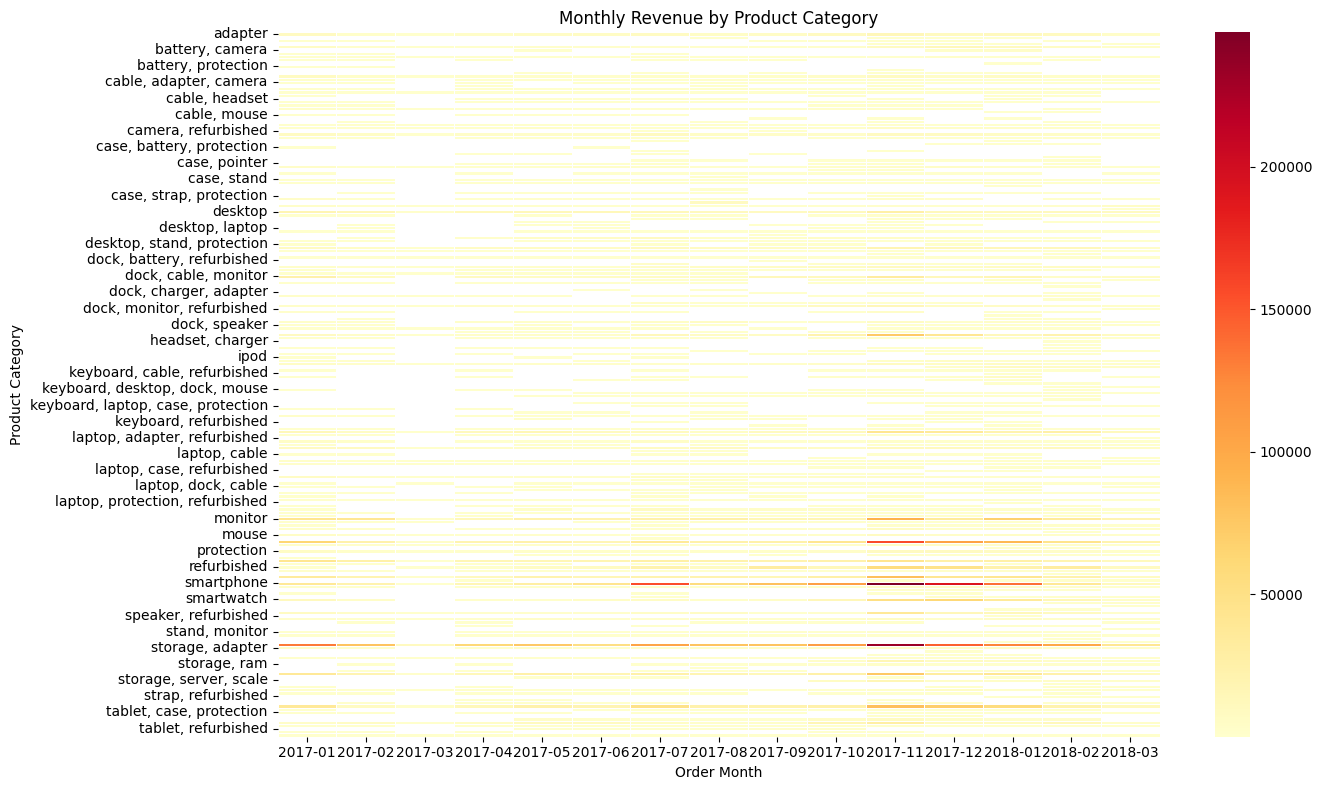

In [556]:
plt.figure(figsize=(14, 8))

sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title('Monthly Revenue by Product Category')
plt.xlabel('Order Month')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()

In [558]:
analysis_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,revenue,product_category,year,month,order_month
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395,47.49,desktop,2017,1,2017-01
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720,18.99,other,2017,1,2017-01
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,649.903,1.0,13005399,72.19,"laptop, charger",2017,1,2017-01
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298,60.90,storage,2017,1,2017-01
5,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,1.229.905,0.0,11905404,142.49,"case, strap, smartwatch",2017,1,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,24.99,199.904,0.0,13835403,16.52,"laptop, case, protection",2018,3,2018-03
62099,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,cable,2018,3,2018-03
62100,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,19.98,cable,2018,3,2018-03
62101,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,99.898,1.0,1230,29.97,cable,2018,3,2018-03


In [563]:
brands_df.value_counts().sum()

np.int64(187)

In [565]:
brands_df.head(20)

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


In [566]:
analysis_df = analysis_df.merge(brands_df.rename(columns={'short': 'type', 'long': 'brand_name'}),on='type',how='left')

In [568]:
analysis_df.head(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,revenue,product_category,year,month,order_month,brand_name
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,499.899,1.0,12755395,47.49,desktop,2017,1,2017-01,NaN
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,169.896,0.0,5720,18.99,other,2017,1,2017-01,NaN
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,649.903,1.0,13005399,72.19,"laptop, charger",2017,1,2017-01,NaN
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,707.001,0.0,1298,60.90,storage,2017,1,2017-01,NaN
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,1.229.905,0.0,11905404,142.49,"case, strap, smartwatch",2017,1,2017-01,NaN


In [569]:
brands_df

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [571]:
analysis_df['brand_code'] = analysis_df['type'].str[:3]
analysis_df[['type', 'brand_code']].head(10)

,type,brand_code
0,12755395,127
1,5720,572
2,13005399,130
3,1298,129
4,11905404,119
5,5384,538
6,1387,138
7,12175397,121
8,5398,539
9,1296,129


In [572]:
set(analysis_df['brand_code'].unique()) & set(brands_df['short'].unique())


set()

In [573]:

analysis_df['brand_code'] = analysis_df['type'].str[:3]
brands_df_renamed = brands_df.rename(columns={'short': 'brand_code', 'long': 'brand_name'})

analysis_df = analysis_df.merge(brands_df_renamed, on='brand_code', how='left')
analysis_df[['type', 'brand_code', 'brand_name']].head(10)

,type,brand_code,brand_name
0,12755395,127,NaN
1,5720,572,NaN
2,13005399,130,NaN
3,1298,129,NaN
4,11905404,119,NaN
5,5384,538,NaN
6,1387,138,NaN
7,12175397,121,NaN
8,5398,539,NaN
9,1296,129,NaN


In [581]:
if 'brand_name' in analysis_df.columns:
    analysis_df.drop(columns=['brand_name'], inplace=True)

In [582]:

analysis_df['brand_code'] = analysis_df['sku'].str[:3]

brands_df_renamed = brands_df.rename(columns={'short': 'brand_code', 'long': 'brand_name'})

analysis_df = analysis_df.merge(brands_df_renamed, on='brand_code', how='left')
analysis_df[['sku', 'brand_code', 'brand_name']].head(10)

,sku,brand_code,brand_name
0,OWC0100,OWC,OWC
1,IOT0014,IOT,iOttie
2,APP0700,APP,Apple
3,CRU0039-A,CRU,Crucial
4,PEB0015,PEB,Pebble
5,BEA0065,BEA,Beats
6,SAT0010,SAT,Satechi
7,SYN0139,SYN,Synology
8,LOG0191,LOG,Logitech
9,LGE0031-A,LGE,LG


In [ ]:
category_brand_price = analysis_df.groupby(['product_category', 'brand_name'])['unit_price'].mean().reset_index().sort_values(['product_category', 'unit_price'], ascending=[True, False])

category_product_price = analysis_df.groupby(['product_category', 'name'])['unit_price'].mean().reset_index().sort_values(['product_category', 'unit_price'], ascending=[True, False])